<a href="https://colab.research.google.com/github/bukshalishah/Deep-Learning/blob/master/IMDB_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras import layers
from keras import models
from keras import activations
from keras import optimizers
from keras import losses
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
max(max(sequence) for sequence in train_data)

9999

In [0]:
# Decode

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

decode_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

In [0]:
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
  

In [0]:
x_train = vectorize_sequence(train_data)
x_test  = vectorize_sequence(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.5048 - acc: 0.7872 - val_loss: 0.3776 - val_acc: 0.8705
Epoch 2/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.2992 - acc: 0.9043 - val_loss: 0.3001 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2173 - acc: 0.9285 - val_loss: 0.3079 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1747 - acc: 0.9439 - val_loss: 0.2826 - val_acc: 0.8844
Epoch 5/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1422 - acc: 0.9541 - val_loss: 0.2855 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1148 - acc: 0.9651 - val_loss: 0.3143 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - 

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

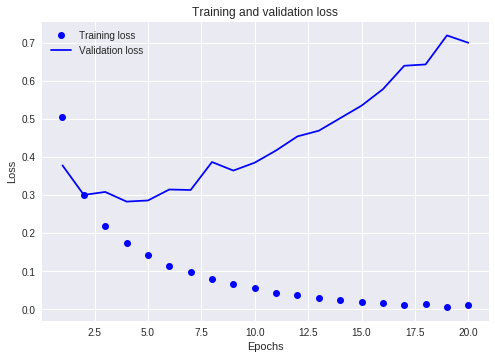

In [17]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

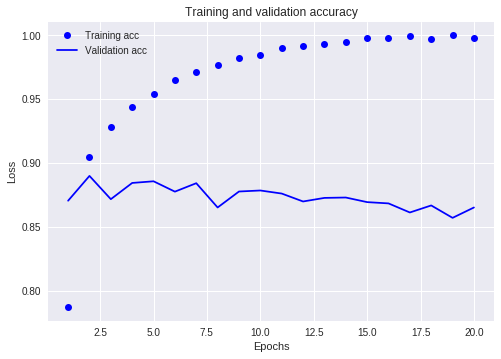

In [18]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: ", test_accuracy, "\nTest Loss: ", test_loss)

Epoch 1/5
25000/25000 [==============================] - 3s 105us/step - loss: 0.4737 - acc: 0.8216
Epoch 2/5
25000/25000 [==============================] - 2s 89us/step - loss: 0.2672 - acc: 0.9096
Epoch 3/5
25000/25000 [==============================] - 2s 86us/step - loss: 0.2031 - acc: 0.9284
Epoch 4/5
25000/25000 [==============================] - 2s 86us/step - loss: 0.1712 - acc: 0.9389
Epoch 5/5
25000/25000 [==============================] - 2s 64us/step
Test Accuracy:  0.88148 
Test Loss:  0.3074799060964584
